# Importing Libaries

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# Read and Explore Data

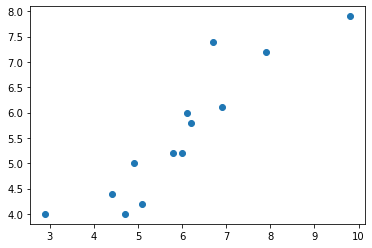

In [26]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

In [27]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

# Adagrad Algorithm

In [46]:
theta = np.array([0 , 0 ])
alpha = 0.00001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []

theta_zero = []
theta_one = []
Max_no_iter = 100000

Vt = 0
epslon = 1e-8
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Vt + ((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    theta = theta - (alpha/np.sqrt(Vt+epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
    
print(theta)   

[0.00198461 0.00198461]


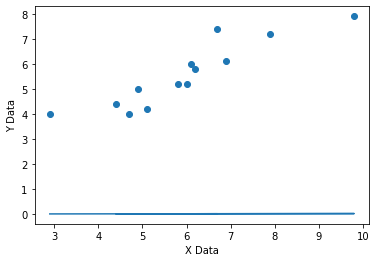

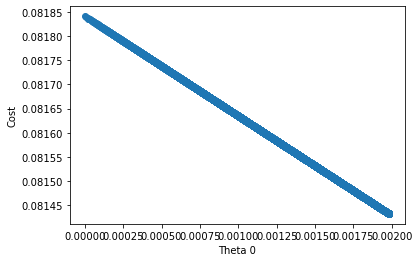

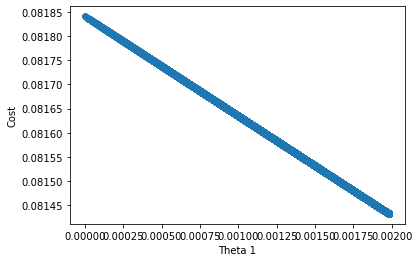

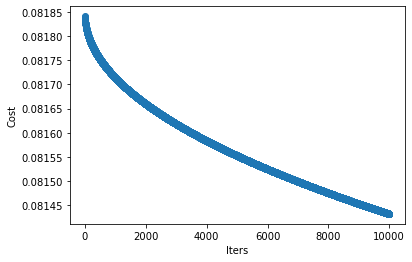

In [47]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# RMSProp Algorithm

In [43]:
theta = np.array([0 , 0 ])
alpha = 0.00001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10

Vt = 0
epslon = 1e-8
Beta = 0.2
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#         break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Beta*Vt + (1-Beta)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    theta = theta - (alpha/np.sqrt(Vt+epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
    
print(theta)

[0.00010144 0.00010144]


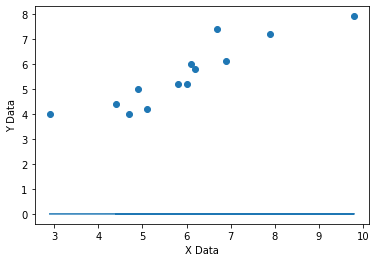

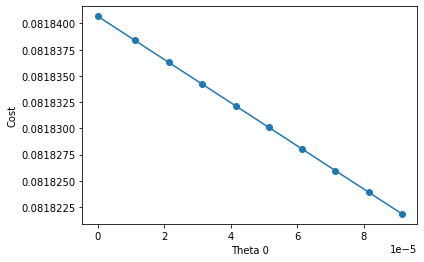

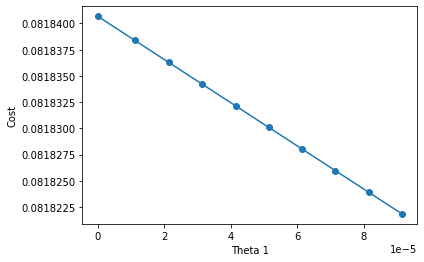

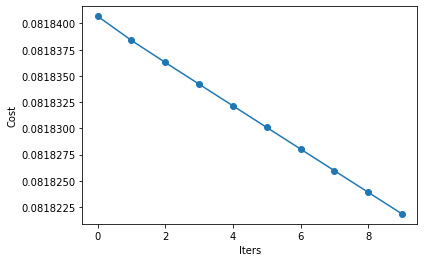

In [44]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adam Algorithm

In [23]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 1000

Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.9
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
#     if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
#         break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Mt = Beta_1*Mt + (1-Beta_1)*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    Vt = Beta_2*Vt + (1-Beta_2)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    Mt_hat = Mt/(1-Beta_1)
    Vt_hat = Vt/(1-Beta_2)
    theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat
    
    
print(theta) 



[0.03984298 0.03984298]


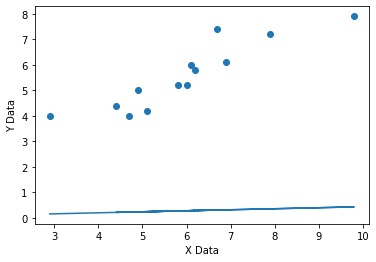

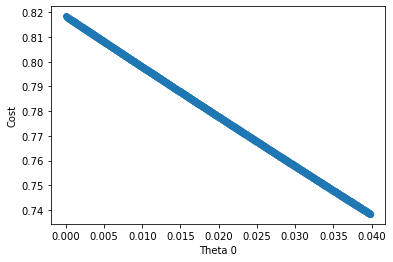

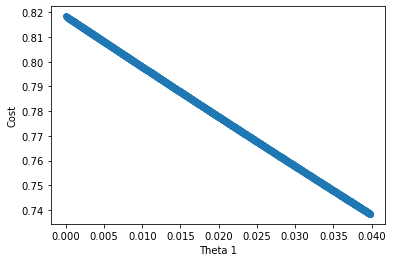

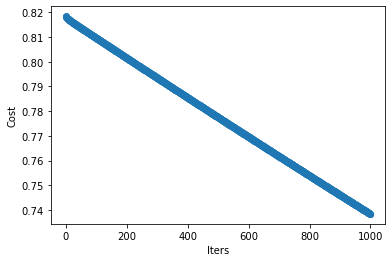

In [24]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()